# **Linear, Multiple, and Polynomial Regressions**



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv(r'C:\Users\soni0\OneDrive\Desktop\docs\1\FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [0]:
fdf = df[['ENGINESIZE','CO2EMISSIONS']]

In [0]:
fdf.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


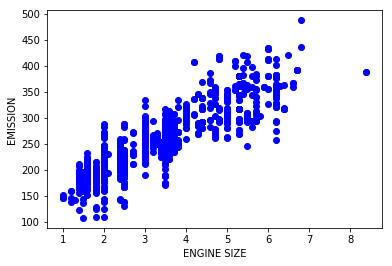

In [0]:
plt.scatter(fdf.ENGINESIZE, fdf.CO2EMISSIONS, color='b')
plt.xlabel('ENGINE SIZE')
plt.ylabel('EMISSION')
plt.show()

In [0]:
features = fdf[['ENGINESIZE']]
target = fdf[['CO2EMISSIONS']]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(features, target)

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
tnp = np.array(target)
tnp[0:10]

array([[196],
       [221],
       [136],
       [255],
       [244],
       [230],
       [232],
       [255],
       [267],
       [212]], dtype=int64)

In [0]:
ycaps = model.predict(X_test)
ycaps[0:10]

array([[195.84486844],
       [262.04503071],
       [265.9391579 ],
       [180.26835968],
       [195.84486844],
       [230.89201317],
       [328.24519297],
       [262.04503071],
       [258.15090351],
       [223.10375879]])

In [0]:
#y=mx+c
m = model.coef_
c = model.intercept_

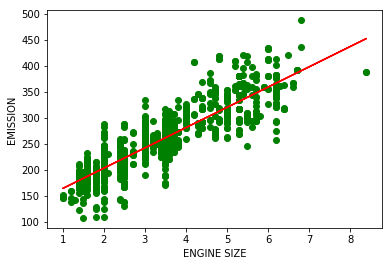

In [0]:
plt.scatter(fdf.ENGINESIZE, fdf.CO2EMISSIONS, color='g')
plt.plot(X_test, m*X_test+c, '-r' )
plt.xlabel('ENGINE SIZE')
plt.ylabel('EMISSION')
plt.show()

In [0]:
X_test.shape
# ycaps.shape

(267, 1)

In [0]:
from sklearn.metrics import r2_score

In [0]:
print('Accuracy score : ',str(round(r2_score(y_test,ycaps)*100,2)),'%')

Accuracy score :  77.54 %


**USING MULTIPLE FEATURES (MULTIPLE REGRESSION)**

In [0]:
ndf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
ndf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


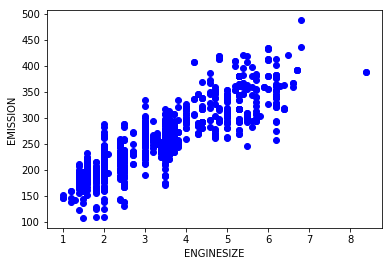

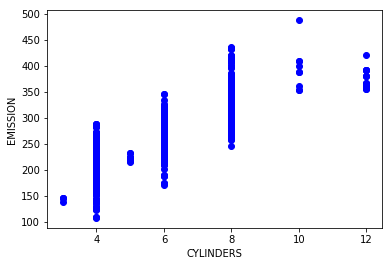

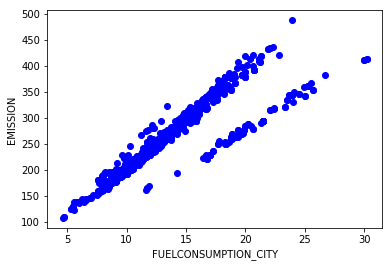

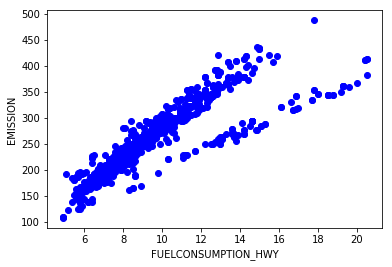

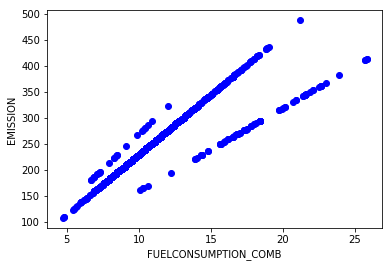

In [0]:
for col in ndf.columns:
    if col != 'CO2EMISSIONS':
        plt.scatter(ndf[col], ndf.CO2EMISSIONS,color='b')
        plt.xlabel(col)
        plt.ylabel('EMISSION')
        plt.show()

In [0]:
featuresprime = df[['ENGINESIZE','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]

In [0]:
X_tr,X_t,y_tr,y_t = train_test_split(featuresprime, target)

In [0]:
new_model = LinearRegression().fit(X_tr, y_tr)

In [0]:
yncaps = new_model.predict(X_t)
yncaps[0:9]

array([[291.1670346 ],
       [249.34214173],
       [260.46457507],
       [312.93077627],
       [244.99652568],
       [253.89774502],
       [289.91818506],
       [266.09557973],
       [241.10744711]])

In [0]:
np.asarray(y_t[0:9])

array([[327],
       [246],
       [262],
       [350],
       [294],
       [255],
       [246],
       [285],
       [221]], dtype=int64)

In [0]:
print('Accuracy Score : ',str(round(r2_score(y_t,yncaps)*100,2)),'%')

Accuracy Score :  85.77 %


**POLYNOMIAL REGRESSION**

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [0]:
X_tr_poly = poly.fit_transform(X_train)
X_tr_poly

array([[ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.3 , 10.89],
       [ 1.  ,  2.  ,  4.  ],
       ...,
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  4.  , 16.  ]])

In [0]:
pmodel = LinearRegression().fit(X_tr_poly, y_train)

In [0]:
ypcaps = pmodel.predict(X_tr_poly)

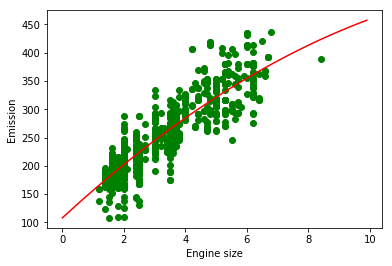

In [0]:
plt.scatter(X_train.ENGINESIZE, y_train.CO2EMISSIONS,  color='g')
XX = np.arange(0.0, 10.0, 0.1)
yy = pmodel.intercept_[0]+ pmodel.coef_[0][1]*XX+ pmodel.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [0]:
X_t_poly = poly.fit_transform(X_test)

In [0]:
y_t_polycaps = pmodel.predict(X_t_poly)

In [0]:
print('Accuracy Score : ',str(round(r2_score(y_t_polycaps,y_test)*100,2)),'%')

Accuracy Score :  70.11 %
